# Objective

**Build a model that predicts whether a
passenger on the Titanic survived or not.

**The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.preprocessing import LabelEncoder


# Data collection

In [2]:
titan = pd.read_csv("Titanic.csv")
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# first 5 rows
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# last 5 rows
titan.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# number of rows and columns
titan.shape

(891, 12)

In [7]:
# column names
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Datatype of Survived column.

titan['Survived'].dtype

dtype('int64')

In [9]:
# Information about dataset.
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### converting datatypes

In [10]:
titan['Name'] = titan['Name'].astype(pd.StringDtype())

titan['Sex'] = titan['Sex'].astype(pd.StringDtype())

titan['Embarked'] = titan['Embarked'].astype(pd.StringDtype())

In [11]:
# Check if there's any non-zero value after the decimal
#titan['has_non_zero_decimal'] = (titan['Age'] % 1 != 0)


In [12]:
# titan # here it shows False, so there is no number after decimal.

In [13]:
# Convert to string and remove the decimal point

#titan['Age'] = titan['Age'].astype(str).str.split('.').str[0]


In [14]:
titan.info() # after removing decimal part again it is showing object because it contains NAN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    string 
dtypes: float64(2), int64(5), object(2), string(3)
memory usage: 83.7+ KB


### finding null values

In [15]:
null = titan.isnull().sum()
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

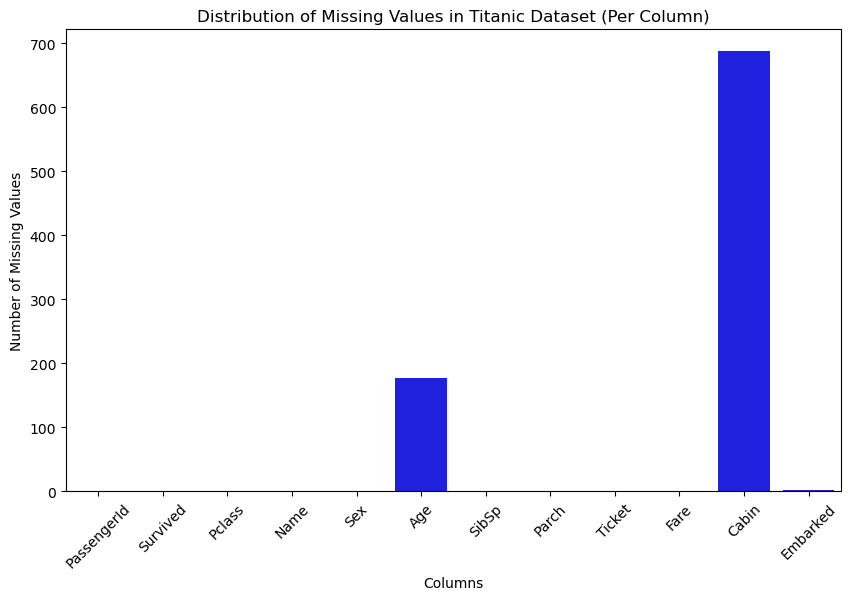

In [16]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null.index, y=null.values, color="blue")
plt.title('Distribution of Missing Values in Titanic Dataset (Per Column)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show();

** Interpretation
* There are null values in age, cabin columns.
* More null values in cabin column.

# 'Survived' Distribution.

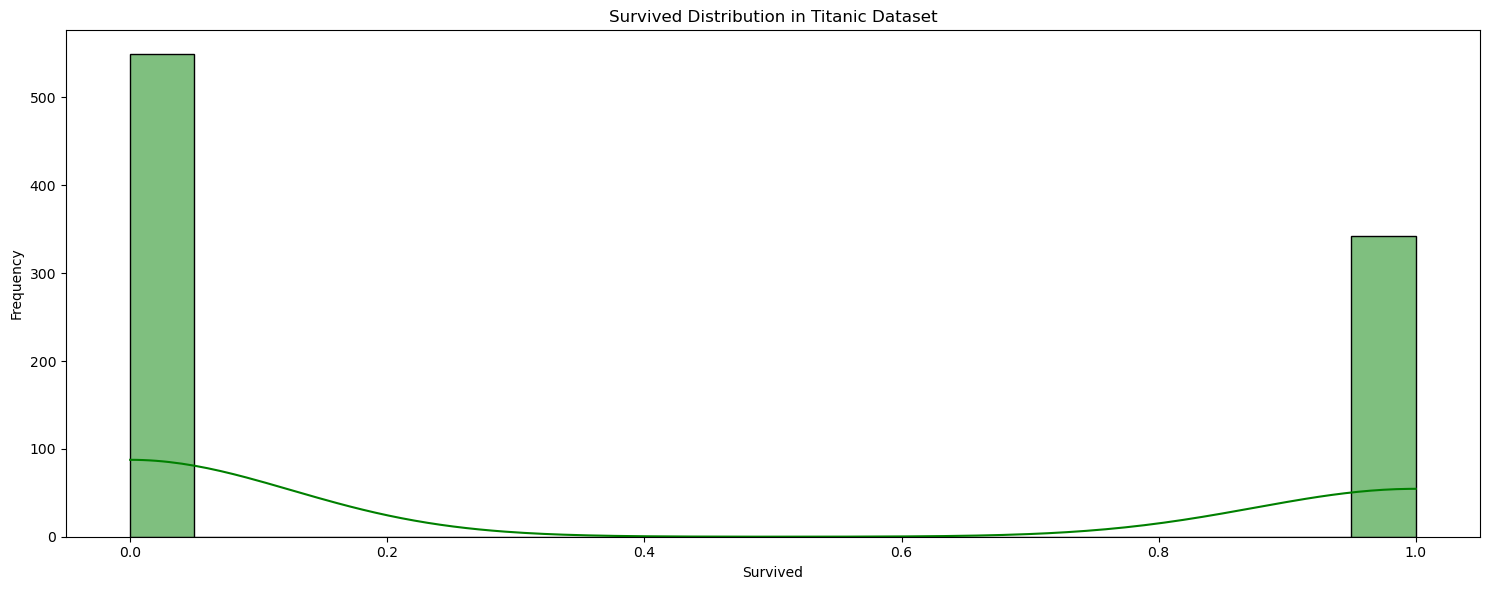

In [17]:
# Histplot
plt.figure(figsize=(15,6))

#plt.subplot(1,2,1)

sns.histplot(titan['Survived'], bins=20, kde=True, color='green')
plt.title('Survived Distribution in Titanic Dataset')
plt.xlabel('Survived')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show();


**Interpretation

* Here there is no symmetric distribution, so we use median to place in null values.

In [18]:
# Handle missing values for 'Age' by filling with the median value
titan['Age'] = titan['Age'].fillna(titan['Age'].median())

In [19]:
# Most frequent values in Embarked column.
print(titan['Embarked'].mode())

0    S
Name: Embarked, dtype: string


In [20]:
# Handle missing values for 'Embarked' by filling with the mode value
titan['Embarked'] = titan['Embarked'].fillna(titan['Embarked'].mode()[0])

In [21]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Checking Duplicate data

In [5]:
titan.duplicated().sum()

0

* There is no duplicate data.

### Data Transformation

In [22]:
# converting sex into 0 & 1 and embarked columns into 0,1 & 2.

In [23]:
# Convert categorical variables ('Embarked') into numerical values
titan['Embarked'] = titan['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [24]:
# finding the datatype of sex and embarked.
titan.info() #here sex and embarked dtype automatically changed to int type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(2), string(2)
memory usage: 83.7+ KB


<Axes: >

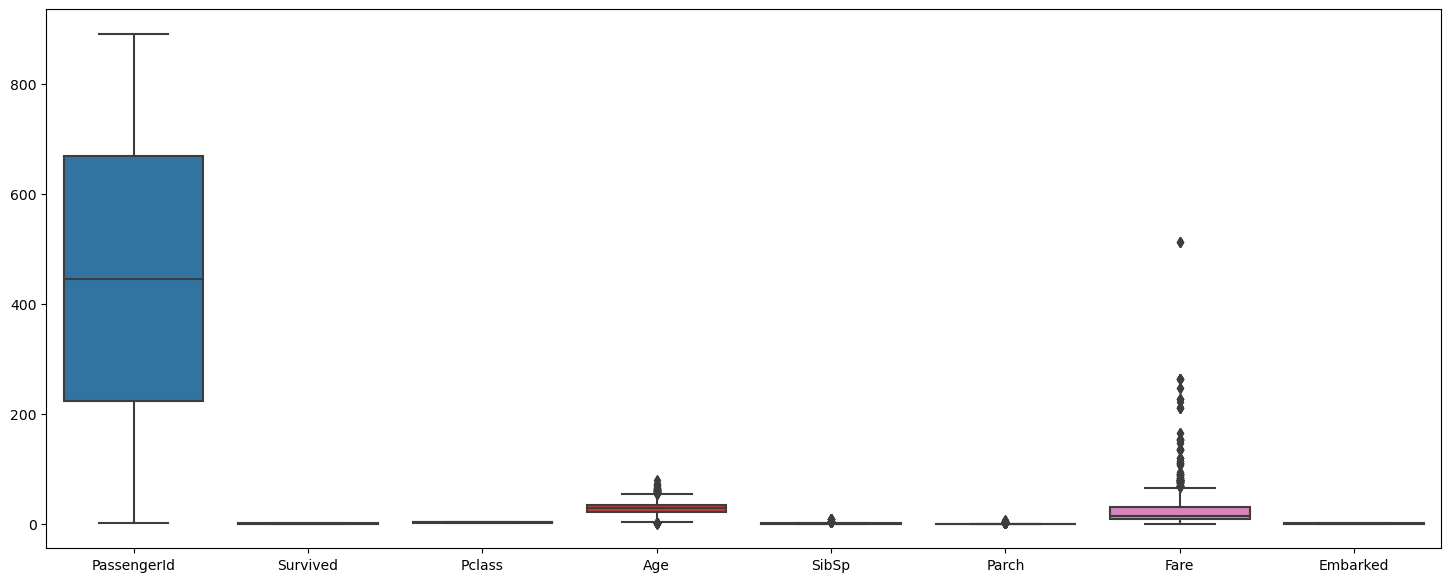

In [25]:
# finding outliers.
plt.figure(figsize = (18,7))
sns.boxplot(data = titan)

In [26]:
min_Age = titan['Age'].min()
min_Age

0.42

In [27]:
max_Age = titan['Age'].max()
max_Age

80.0

In [28]:
titan['Age'] = (titan['Age'] - min_Age) / (max_Age - min_Age)
titan['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.346569
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [29]:
min_fare = titan['Fare'].min()
min_fare

0.0

In [30]:
max_fare = titan['Fare'].max()
max_fare

512.3292

In [31]:
titan['Fare'] = (titan['Fare'] - min_fare) / (max_fare - min_fare)
titan['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

<Axes: >

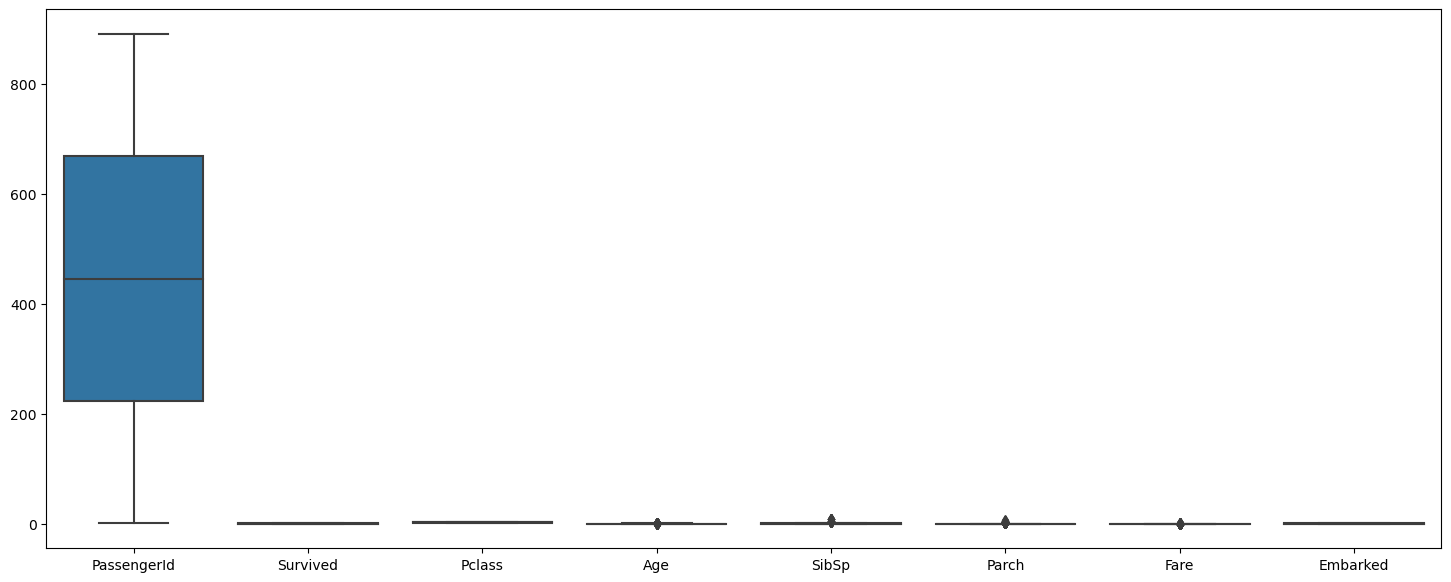

In [32]:
# checking outliers.
plt.figure(figsize = (18,7))
sns.boxplot(data = titan)

# Analysing the data.

In [33]:
# Statistical information.
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.363679,0.523008,0.381594,0.062858,0.361392
std,257.353842,0.486592,0.836071,0.163605,1.102743,0.806057,0.096995,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440,0.000000
50%,446.000000,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213,0.000000
75%,668.500000,1.000000,3.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,2.000000


In [34]:
# values with their count.
value_counts = titan['Survived'].value_counts()
value_counts

0    549
1    342
Name: Survived, dtype: int64

In [35]:
#sns.set()
#sns.countplot(x = 'Survived', data=titan)

### Correlation

In [58]:
titan.corr()

C:\Users\PRISCILLA\AppData\Local\Temp\ipykernel_10448\519202250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titan.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


C:\Users\PRISCILLA\AppData\Local\Temp\ipykernel_10448\2338994626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titan.corr(), annot=True, linewidths=.5, fmt= '.1f')


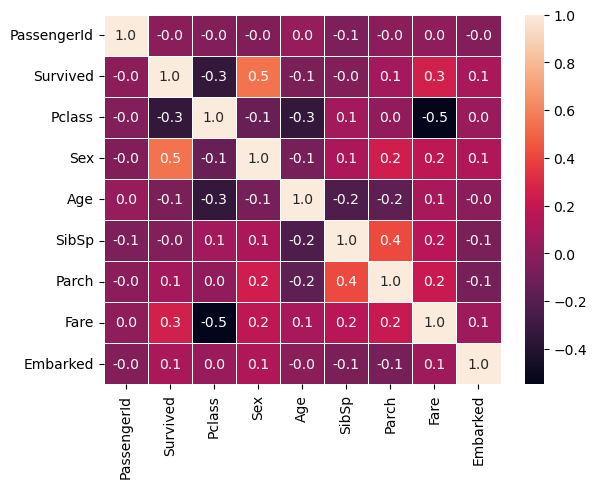

In [60]:
sns.heatmap(titan.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

** Interpretation
* we see the correlation :- it tells the relation between variables.
* There is a more relation between survived and sex(0.5).
* The next relation between parch and sibsp(0.4).
* The next relation between survived and fare(0.3).

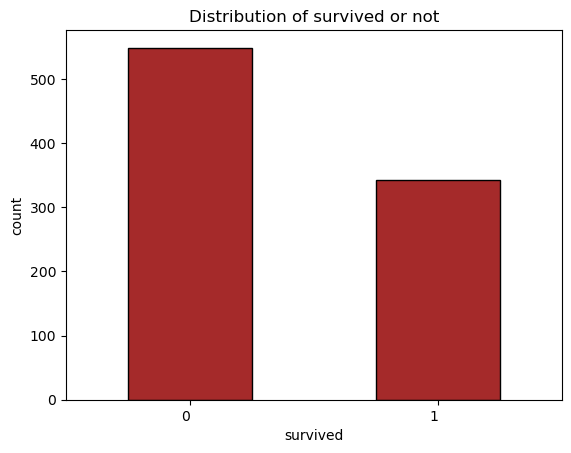

In [36]:
# Plotting the distribution of survived
value_counts.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Distribution of survived or not')
plt.xlabel('survived')
plt.ylabel('count')
plt.xticks(rotation=0, ha='right')
plt.show()

In [37]:
# values with their count.
value_counts1 = titan['Sex'].value_counts()
value_counts1

male      577
female    314
Name: Sex, dtype: Int64

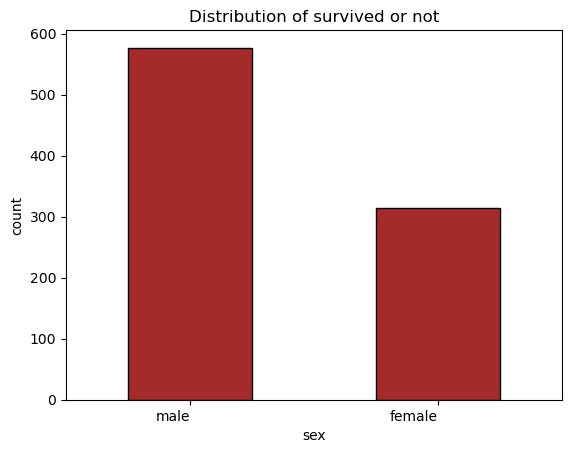

In [38]:
# Plotting the distribution of sex
value_counts1.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Distribution of survived or not')
plt.xlabel('sex')
plt.ylabel('count')
plt.xticks(rotation=0, ha='right')
plt.show()

** Interpretation
* Based on above two graphs, that says  males are more survived than females

<Axes: xlabel='Survived', ylabel='count'>

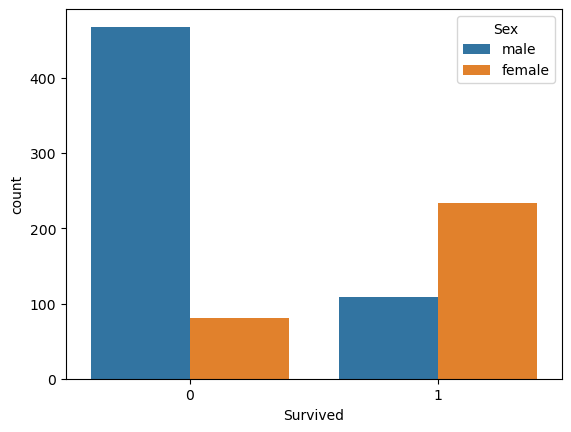

In [39]:
sns.countplot(x = 'Survived', hue = 'Sex',data=titan)

** Interpretation
* From above dataset, in survived(1) more female is survived.

In [40]:
value_count2 = titan['Pclass'].value_counts()
value_count2

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

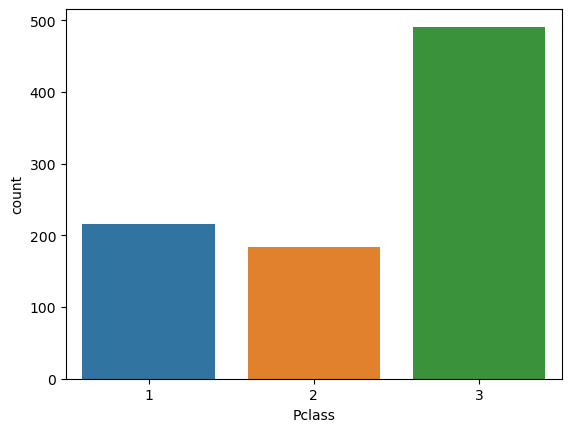

In [41]:
# countplot for pclass(1st,2nd and 3rd class)
sns.countplot(x = 'Pclass',data = titan)

<Axes: xlabel='Survived', ylabel='count'>

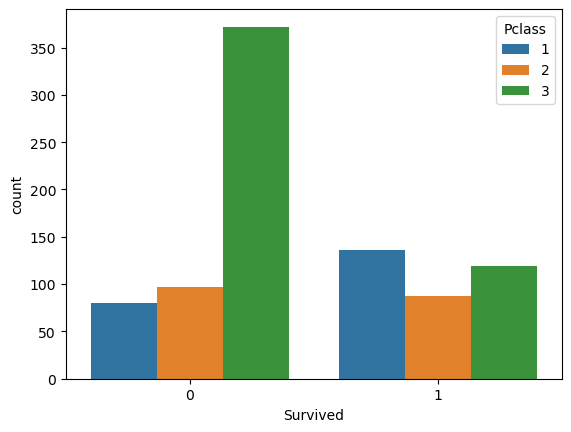

In [42]:
sns.countplot(x='Survived',hue = 'Pclass',data = titan)

** Interpretation
* from above graph 1st class people is most survived.
* next 3rd class people is survived and 2nd class people is survived.

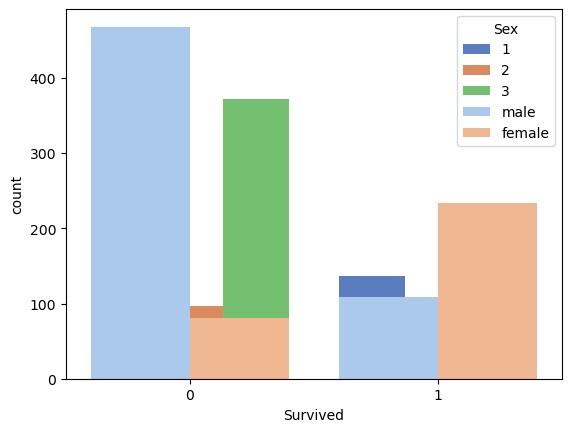

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot with `Pclass`, `Sex`, and `Survived`
sns.countplot(x='Survived', hue='Pclass', data=titan, palette='muted')

# Create a second layer for the 'Sex' hue
sns.countplot(x='Survived', hue='Sex', data=titan, palette='pastel')

# Display the plot
plt.show()


** Interpretation

### survived
* From above graph we see that more female is survived(1) of 1st class people.
* less male persons are survived(1).

### Not survived.
* more male persons are not survived(1).
* less females are not survived(0) of 2nd and 3rd class people

In [44]:
### Transformming sex column into 0 & 1.

In [45]:
titan['Sex'] = titan['Sex'].map({'male': 0, 'female': 1})

In [46]:
# Define features (X) and target variable (y)
X = titan[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titan['Survived']


# Logistic Regression

In [ ]:
# Filling Null values in Age colmn.

# Handle missing values for 'Age' by filling with the median value
titan['Age'] = titan['Age'].fillna(titan['Age'].median())

titan['Embarked'] = titan['Embarked'].fillna(titan['Embarked'].mode()[0])

In [ ]:
# Convert categorical variables ('Sex', 'Embarked') into numerical values
titan['Sex'] = titan['Sex'].map({'male': 0, 'female': 1})
titan['Embarked'] = titan['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
# Define features (X) and target variable (y)
X = titan[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titan['Survived']


# Split the Data into Training and Testing Sets

In [ ]:
# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Model

In [71]:
print(X_train.shape,y_train.shape)

(712, 7) (712,)


In [ ]:
**Interpretation
* In training data 712 datapoints are used of 7 columns 80% data is used for traing.

In [72]:
print(X_test.shape,y_test.shape)

(179, 7) (179,)


In [ ]:
**Interpretation
* In testing data 179 datapoints are used of 7 columns means 20% of testing data is used.

In [50]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
# predicting the x_train data.
x_train_prediction = model.predict(X_train)
x_train_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [54]:
# Accuracy for x_train and y_train.

accuracy_training_data = accuracy_score(x_train_prediction,y_train)
accuracy_training_data

0.8019662921348315

** Interpretation
* The training data x and y has 80% Accuracy.

In [55]:
# predicting the y_test data.
x_test_prediction = model.predict(X_test)
x_test_prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [57]:
# Accuracy for x_test and y_test.

accuracy_testing_data = accuracy_score(x_test_prediction,y_test)
accuracy_testing_data

0.7877094972067039

** Interpretation
* The accuracy for x and y test is 79% .